In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from tqdm import tqdm



import pyproj

PROJ = pyproj.Proj(proj='stere',  a=6378273, b=6378273, lon_0=-45, lat_0=90, lat_ts=90)

##Adding src path to get our code
import sys
sys.path.append('../src')
from ice_graph.ice_graph import Ice_graph

from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Load the files (Note, you need to clone the repo first -- upper cells)
file_graphs = [dict(np.load(f'../example_data/{file}')) for file in sorted(os.listdir('../example_data')) if file[-3:]=='npz']
nextsim = Ice_graph(
    file_graphs,
    vertex_element_features =
        ['M_wind_x',
        'M_wind_y',
        'M_ocean_x',
        'M_ocean_y',
        'M_VT_x',
        'M_VT_y',
        'x',
        'y']
)

sample = file_graphs[2]

In [5]:
sample.keys()

dict_keys(['Damage', 'Concentration', 'Thickness', 'Sigma_0', 'Sigma_1', 'M_VT_x', 'M_VT_y', 'M_wind_x', 'M_wind_y', 'M_ocean_x', 'M_ocean_y', 'x', 'y', 't', 'i'])

In [3]:
forcing_features = [ 'M_wind_x', 'M_wind_y', 'M_ocean_x', 'M_ocean_y']
for sample in tqdm(file_graphs):
    interpolated_forcing = {}
    for feature in forcing_features:
        interp = LinearNDInterpolator(list(zip(sample['x'], sample['y'])), sample[feature])
        interpolated_forcing[feature] = interp


  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:42<00:00,  1.72s/it]


In [4]:
sample['x'].max(), sample['y'].max()

(1651779.055560625, 2023481.6238180946)

In [13]:
interp(1617, 2)

array(-0.01455483)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


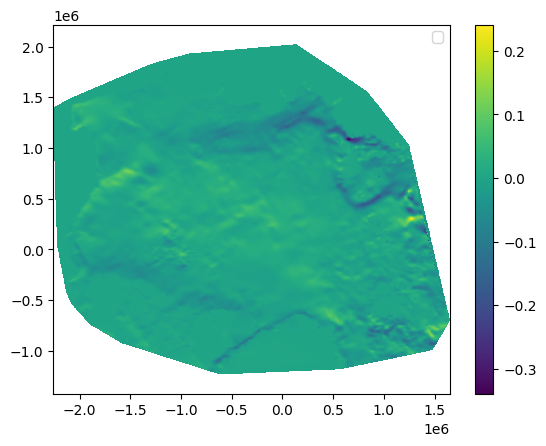

In [27]:


rng = np.random.default_rng()
x = sample['x']
y = sample['y']
z = sample['M_ocean_x']
X = np.linspace(min(x), max(x),num=1000)
Y = np.linspace(min(y), max(y),num=1000)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

plt.pcolormesh(X, Y, Z)
#plt.scatter(x, y, c=z, label="input point")

plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

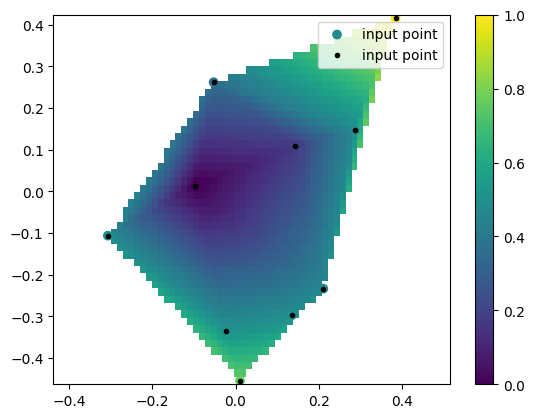

In [35]:


rng = np.random.default_rng()
x = rng.random(10) - 0.5
y = rng.random(10) - 0.5
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

plt.pcolormesh(X, Y, Z, shading='auto')
plt.scatter(x, y, c=z, label="input point")
plt.scatter(x, y, marker='.', c='black',label="input point")

plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()